In [26]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')


This notebook will accomplish the following task:

### Overall goal:
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions

## Scrubbing and Exploring
Are there any null values or outliers? How will you wrangle/handle them?
Are there any variables that warrant transformations?
Are there any useful variables that you can engineer with the given data?
Do you notice any patterns or anomalies in the data? Can you plot them?


In [2]:
df=pd.read_csv(r"C:\Users\JOY\Downloads\marketing_data.csv") #load data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [5]:
df.describe() #summary stats

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum() #checkin for null values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [7]:
df.duplicated().sum() #ceckin for duplicates

0

In [8]:
#income column as space
df.columns = df.columns.str.replace(' ', '')

In [9]:
income_dtype = df['Income'].dtype
print(income_dtype)

object


In [10]:
# transform Income column to a numerical
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [13]:
df.dropna(inplace=True) #deletin null values

In [14]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

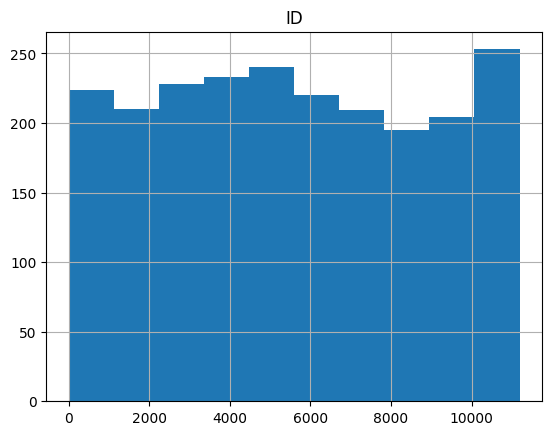

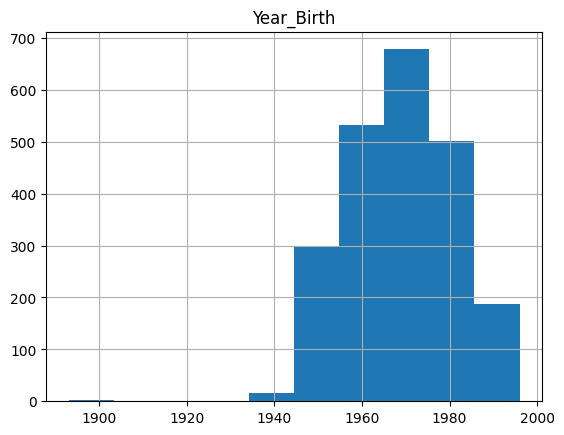

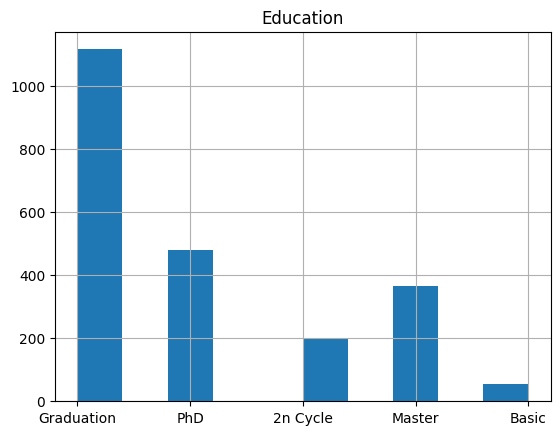

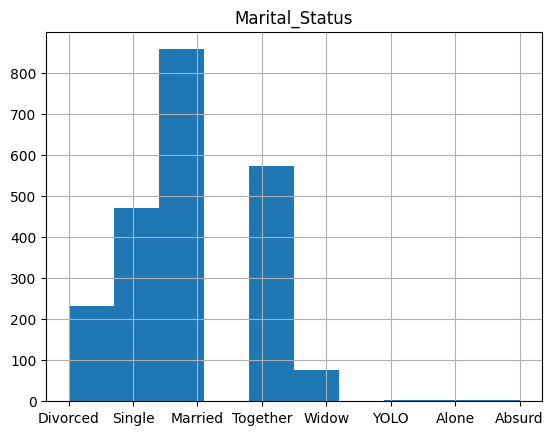

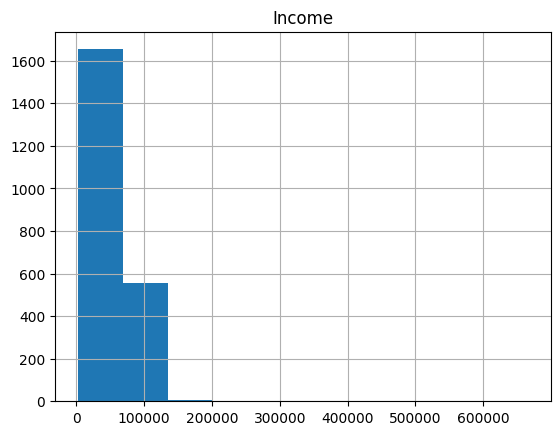

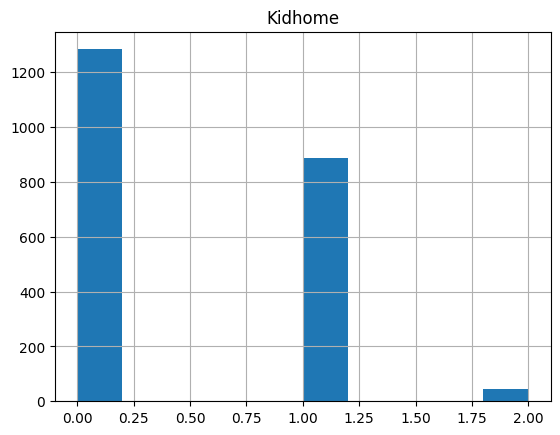

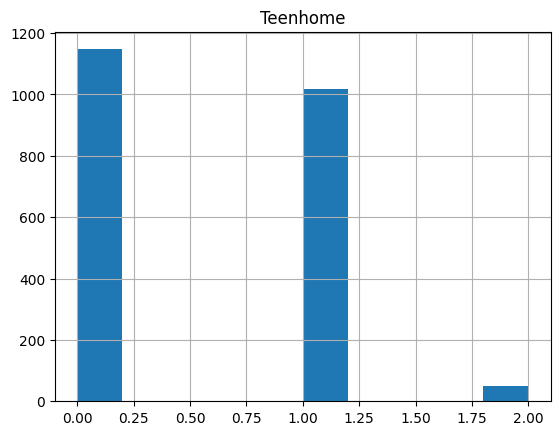

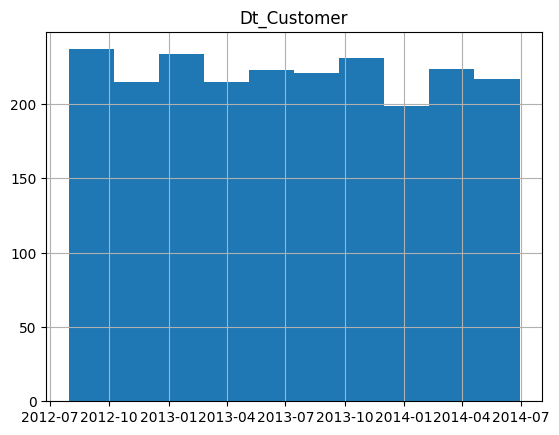

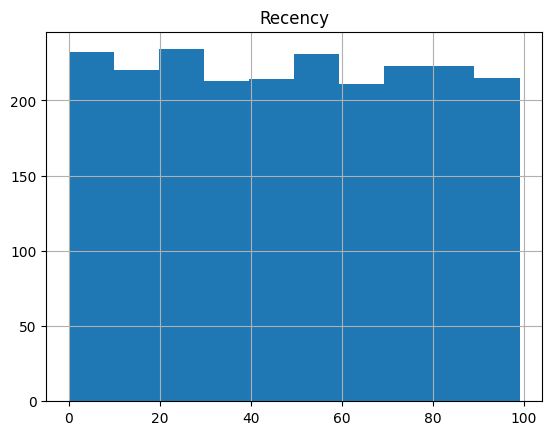

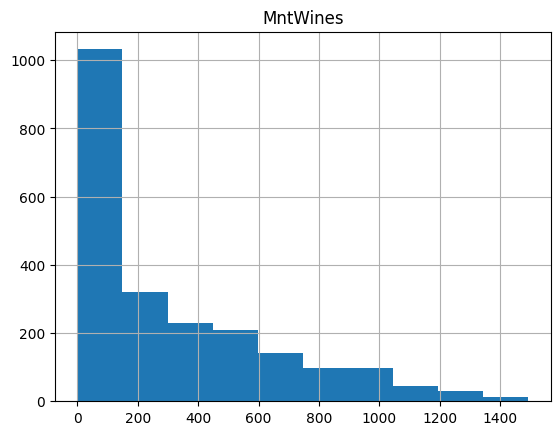

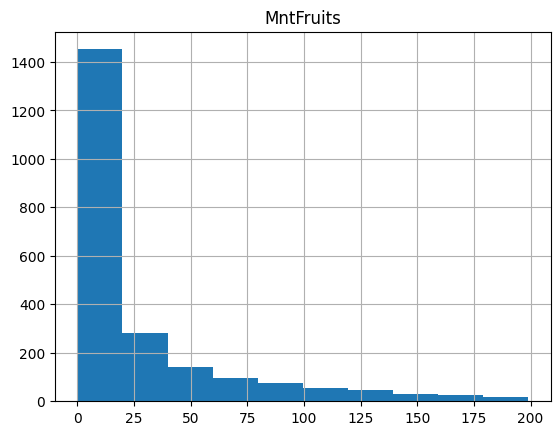

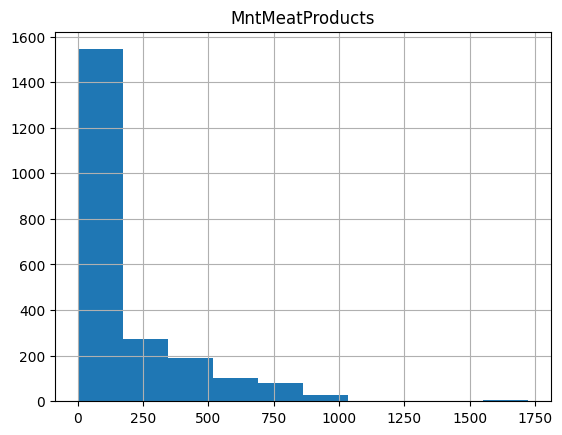

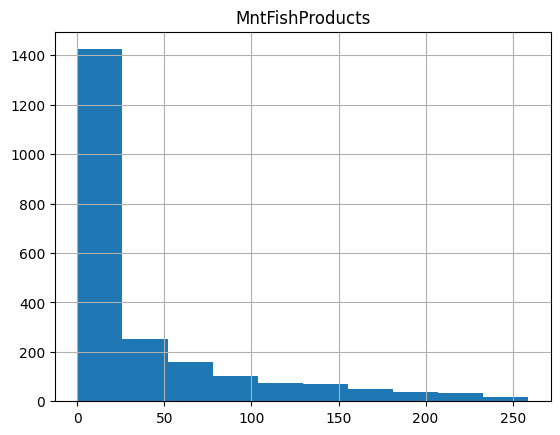

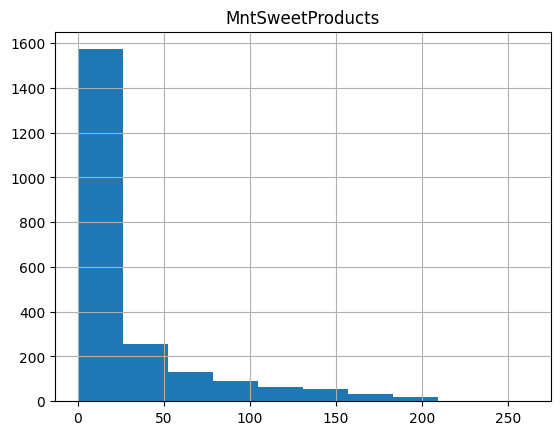

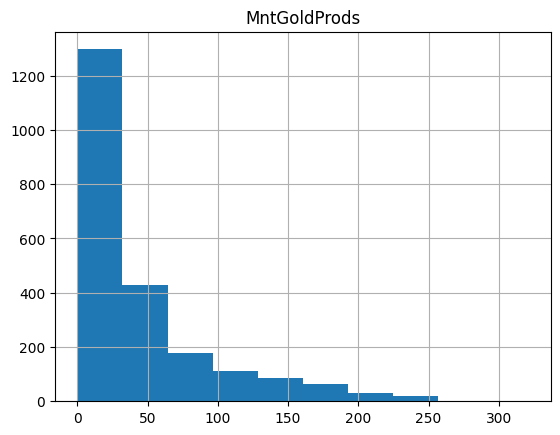

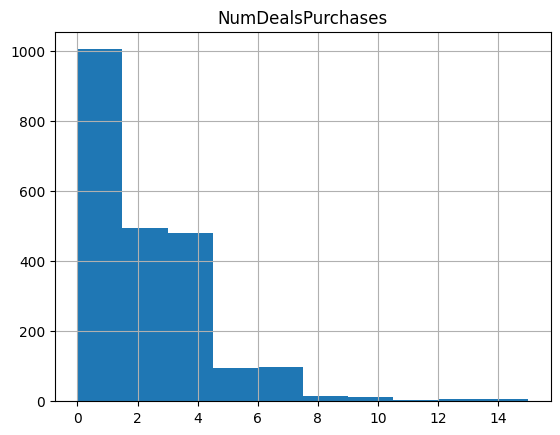

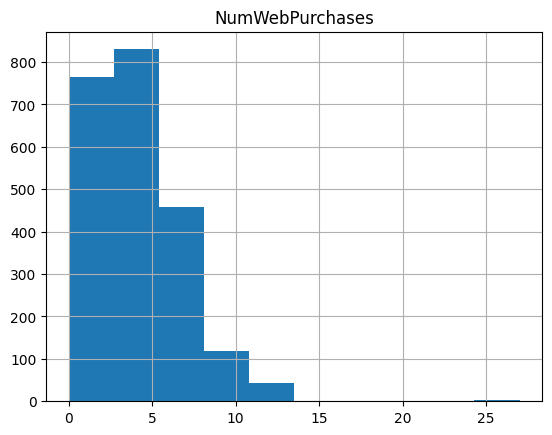

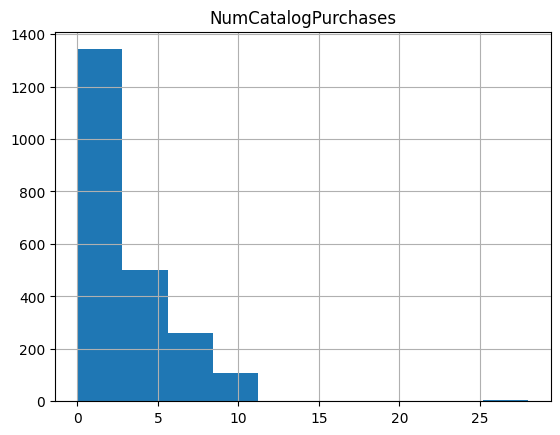

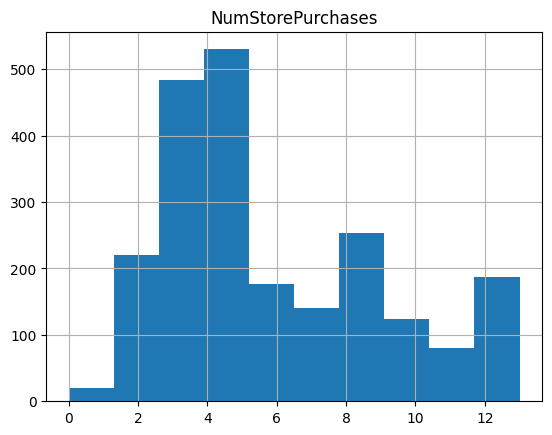

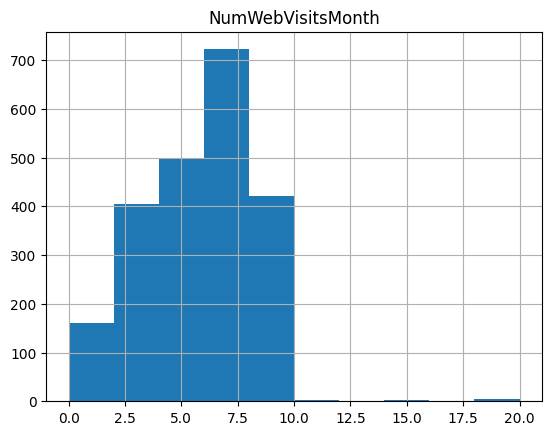

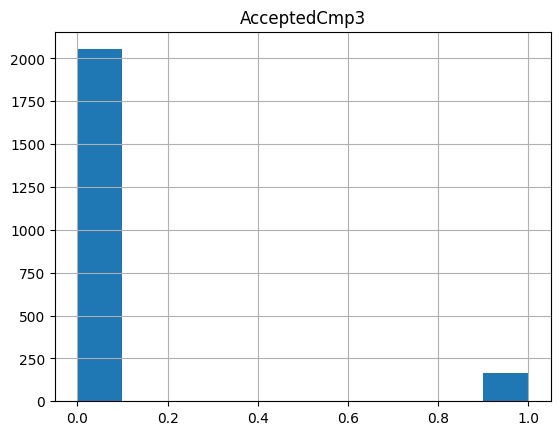

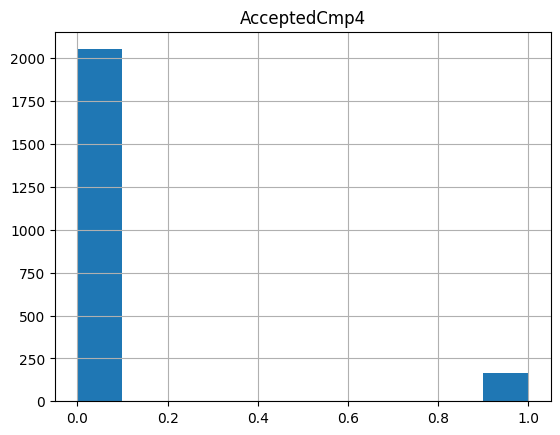

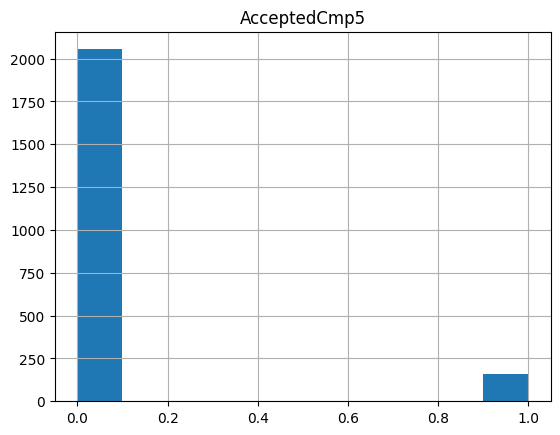

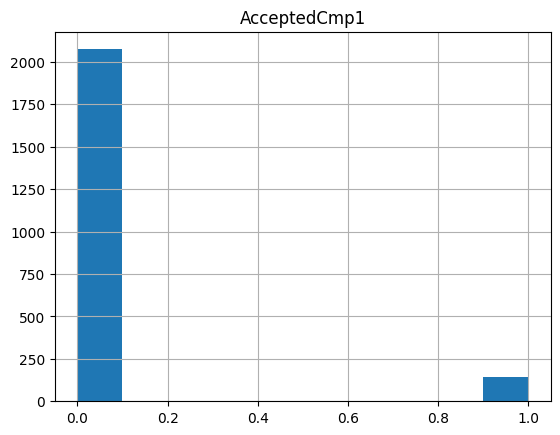

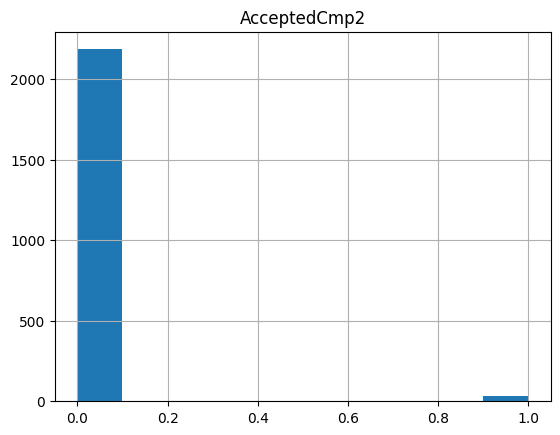

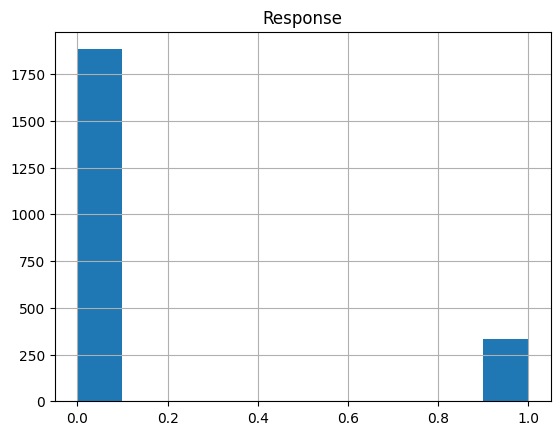

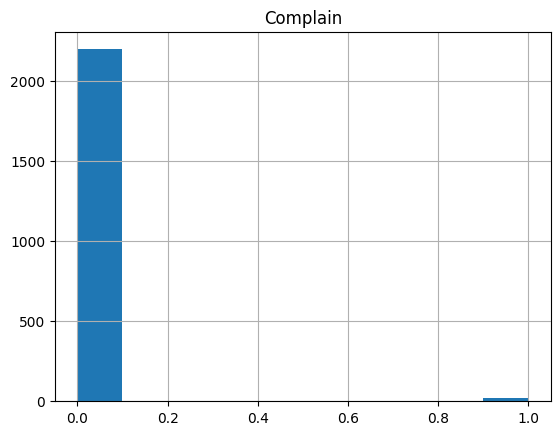

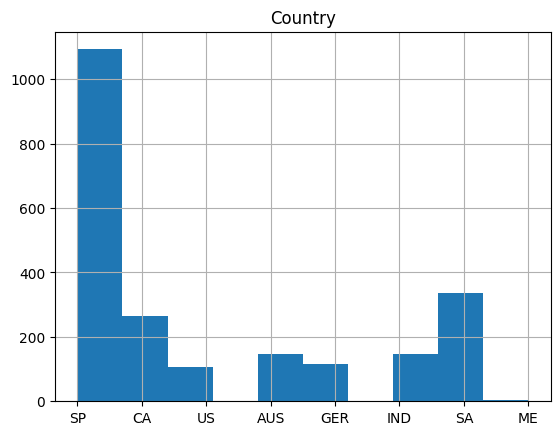

In [15]:
 
for column in df.columns: #Cecckin for distribution
    plt.figure()   
    df[column].hist()   
    plt.title(column)  
    plt.show()   


In [16]:
df.columns 

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [17]:
# Patterns in the data
# marital status and NumStorePurchases vs NumWebPurchases
# 'NumWebVisitsMonth' vs 'NumWebPurchases'
#'Education' and NumStorePurchases vs NumWebPurchases
# 'Income' and NumStorePurchases vs NumWebPurchases
# 'Marital_Status' and 'NumDealsPurchases'
#'MntGoldProds' and NumStorePurchases vs NumWebPurchases
# 'Complain' and 'Recency'
# 'Kidhome','Teenhome' vs 'MntSweetProducts'
#'Education' vs 'MntFishProducts'
# country and NumStorePurchases vs  NumWebPurchases (top 10)
       

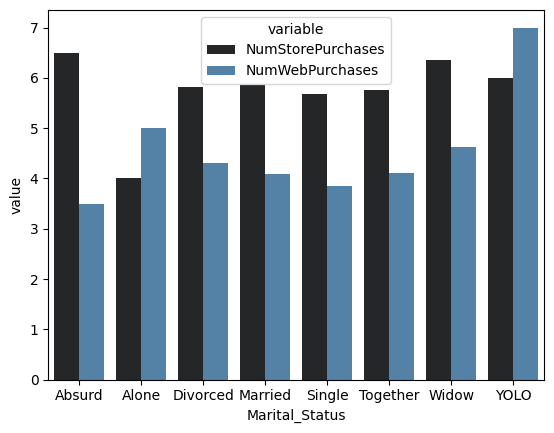

In [18]:
# marital status and NumStorePurchases vs NumWebPurchases  
df_grouped = df.groupby('Marital_Status')[['NumStorePurchases', 'NumWebPurchases']].mean().reset_index() 
sns.barplot(x='Marital_Status', y='value', hue='variable', data=df_grouped.melt(id_vars='Marital_Status'), color='steelblue')
plt.show()


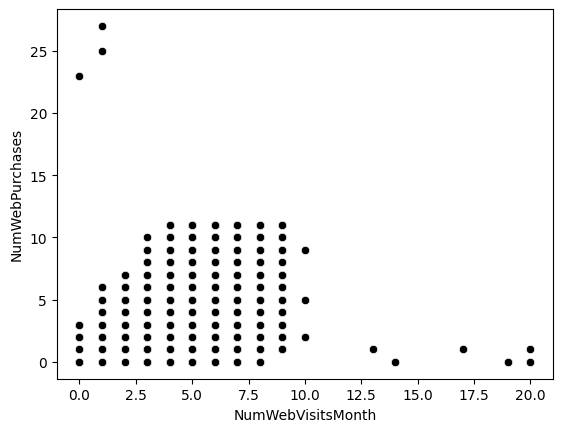

In [19]:
 # 'NumWebVisitsMonth' vs 'NumWebPurchases'
sns.scatterplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df, color='black')
plt.show()


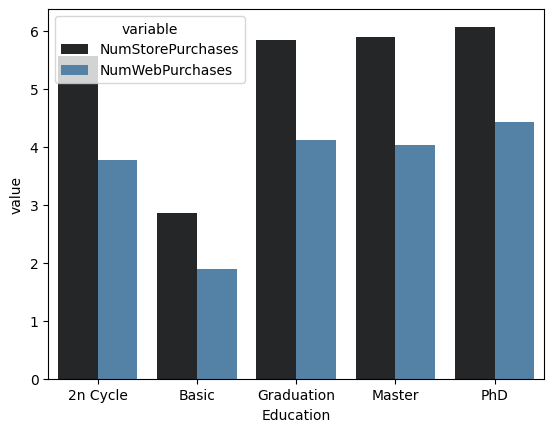

In [20]:
#'Education' and NumStorePurchases vs NumWebPurchases 
df_grouped = df.groupby('Education')[['NumStorePurchases', 'NumWebPurchases']].mean().reset_index() 
sns.barplot(x='Education', y='value', hue='variable', data=df_grouped.melt(id_vars='Education'), color='steelblue')
plt.show()


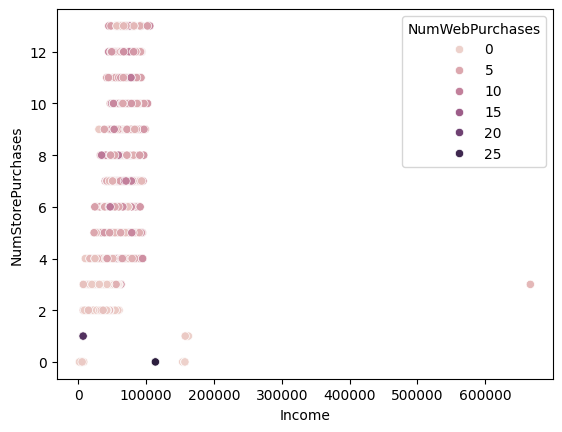

In [21]:
 # 'Income' and NumStorePurchases vs NumWebPurchases
sns.scatterplot(x='Income', y='NumStorePurchases', hue='NumWebPurchases', data=df, color='blue')
plt.show()


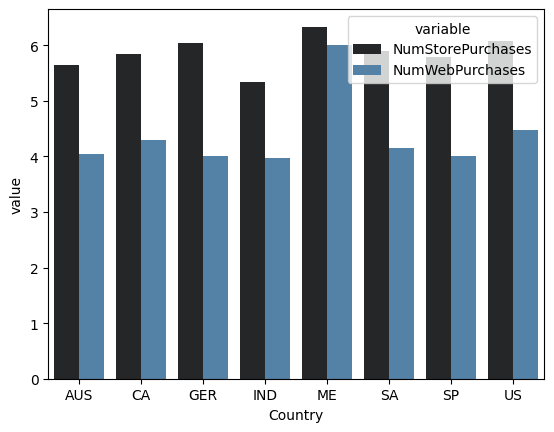

In [22]:
# country and NumStorePurchases vs  NumWebPurchases (top 10)  
df_grouped = df.groupby('Country')[['NumStorePurchases', 'NumWebPurchases']].mean().reset_index() 
sns.barplot(x='Country', y='value', hue='variable', data=df_grouped.melt(id_vars='Country'), color='steelblue')
plt.show()



### Modeling and Interpreting
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

What factors are significantly related to the number of store purchases?
Does US fare significantly better than the Rest of the World in terms of total purchases?
Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
Is there a significant relationship between geographical regional and success of a campaign?

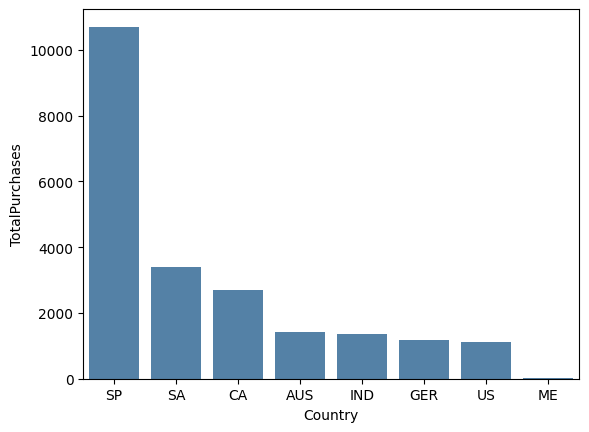

In [23]:
#Does US fare significantly better than the Rest of the World in terms of total purchases?
df['TotalPurchases'] = df['NumStorePurchases'] + df['NumWebPurchases']
df_grouped = df.groupby('Country')['TotalPurchases'].sum().nlargest(10).reset_index()  
sns.barplot(x='Country', y='TotalPurchases', data=df_grouped, color='steelblue')
plt.show()

In [24]:
# people who spent an above average amount on gold in the last 2 years would have more in store purchases. 
avg_gold = df['MntGoldProds'].mean() 
df_above_avg_gold = df[df['MntGoldProds'] > avg_gold]
df_below_avg_gold = df[df['MntGoldProds'] <= avg_gold] 
avg_in_store_purchases_above_avg_gold = df_above_avg_gold['NumStorePurchases'].mean()
avg_web_purchases_above_avg_gold = df_above_avg_gold['NumWebPurchases'].mean()

avg_in_store_purchases_below_avg_gold = df_below_avg_gold['NumStorePurchases'].mean()
avg_web_purchases_below_avg_gold = df_below_avg_gold['NumWebPurchases'].mean() 
print(f"Customers who spent an above average amount on gold made an average of {avg_in_store_purchases_above_avg_gold} in-store purchases and {avg_web_purchases_above_avg_gold} web purchases.")
print(f"Customers who spent a below average amount or no amount on gold made an average of {avg_in_store_purchases_below_avg_gold} in-store purchases and {avg_web_purchases_below_avg_gold} web purchases.")


Customers who spent an above average amount on gold made an average of 7.767575322812052 in-store purchases and 5.642754662840746 web purchases.
Customers who spent a below average amount or no amount on gold made an average of 4.8986175115207375 in-store purchases and 3.37063857801185 web purchases.


In [27]:
#"Married PhD candidates" have a significant relation with amount spent on fish 
married_phd = df[(df['Education'] == 'PhD') & (df['Marital_Status'] == 'Married')]['MntFishProducts']
others = df[(df['Education'] != 'PhD') | (df['Marital_Status'] != 'Married')]['MntFishProducts']

t_stat, p_val = stats.ttest_ind(married_phd, others)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_val}")




t-statistic: -2.8079530241631776
p-value: 0.005029454078749163
